In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv')

In [4]:
df.head(5)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


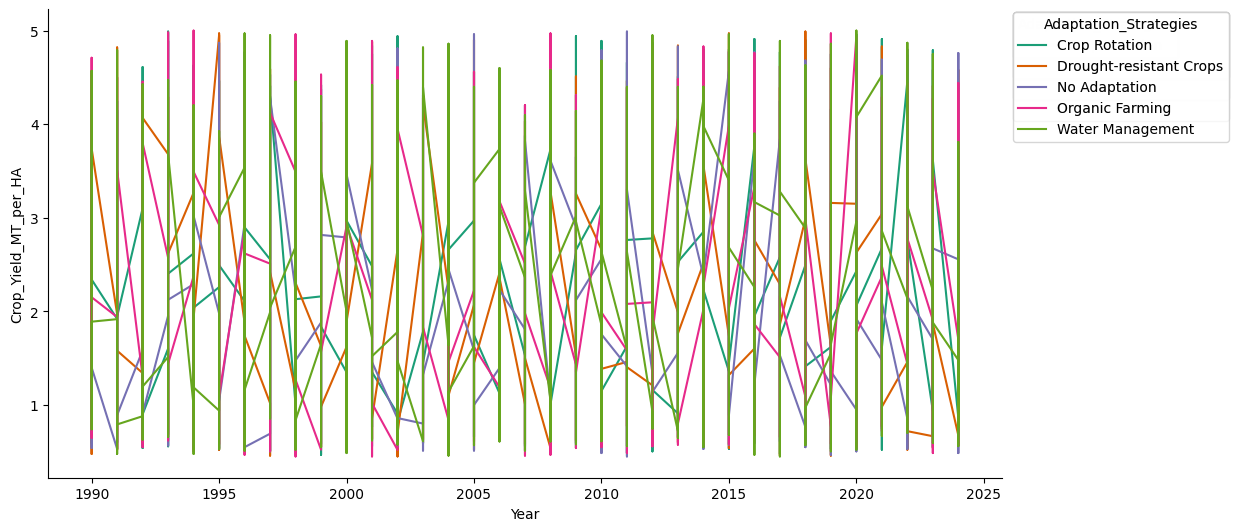

In [5]:
# Year vs Crop_Yield_MT_per_HA

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Crop_Yield_MT_per_HA']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Adaptation_Strategies')):
  _plot_series(series, series_name, i)
  fig.legend(title='Adaptation_Strategies', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Crop_Yield_MT_per_HA')

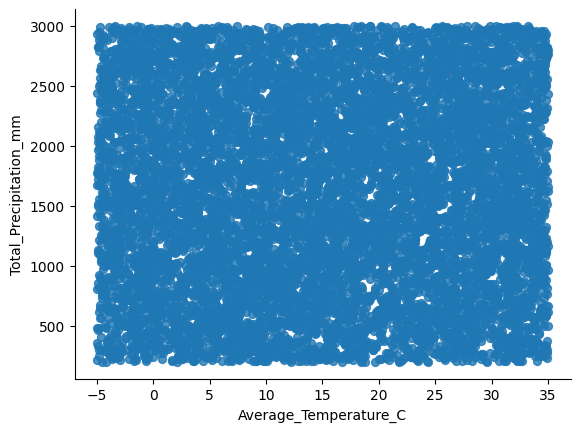

In [6]:
# Average_Temperature_C vs Total_Precipitation_mm

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Average_Temperature_C', y='Total_Precipitation_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [8]:
# Example of further analysis (you can replace this with your desired analysis)
# Check for missing values
print(df.isnull().sum())

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In [9]:
# Summary statistics
print(df.describe())

               Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25% 

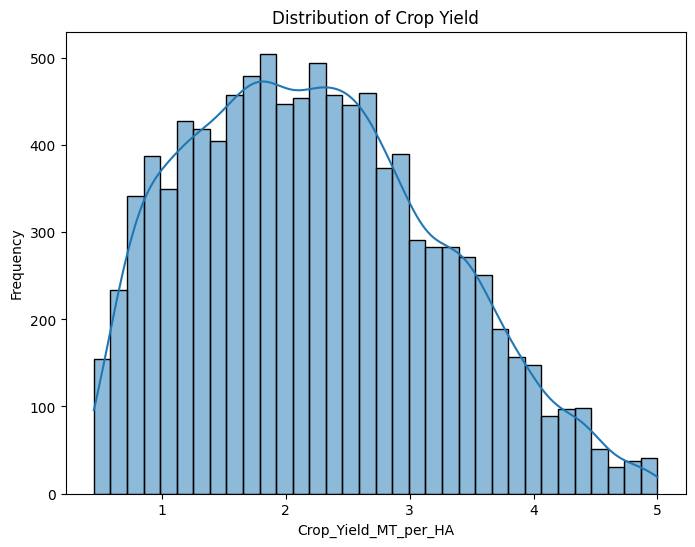

In [10]:
# visualization (histogram of a numerical feature)
# Assuming 'yield' is a numerical column in your dataset.  Replace with the actual name if different
plt.figure(figsize=(8,6))
sns.histplot(df['Crop_Yield_MT_per_HA'], kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop_Yield_MT_per_HA')
plt.ylabel('Frequency')
plt.show()

In [11]:
# sdk models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Prepare the data for modeling
X = df[['Average_Temperature_C', 'Total_Precipitation_mm']]  # Features
y = df['Crop_Yield_MT_per_HA']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
#@title Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can further improve the model by trying different features, models, or hyperparameters.
# Example of using the model for prediction:

# Example new data for prediction
new_data = pd.DataFrame({'Average_Temperature_C': [25], 'Total_Precipitation_mm': [1000]})
predicted_yield = model.predict(new_data)
print(f"Predicted Crop Yield: {predicted_yield[0]}")

Mean Squared Error: 0.9955957020700035
R-squared: 0.05672933154362858
Predicted Crop Yield: 2.433086117286428


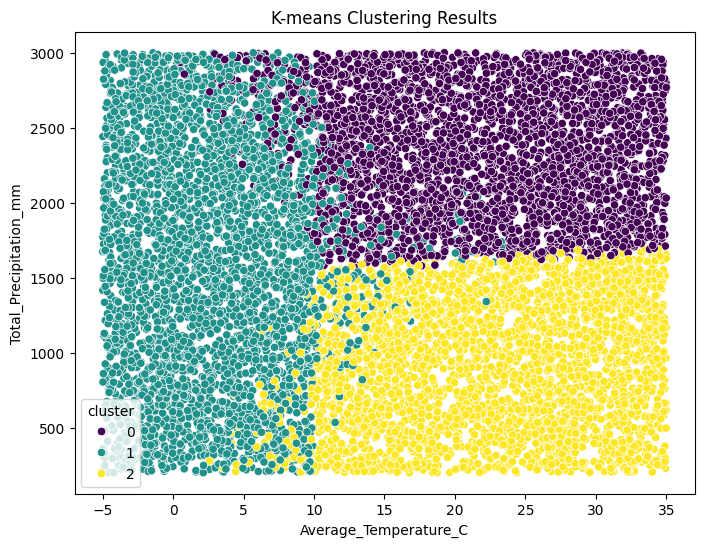

                Year            Average_Temperature_C            \
                mean        std                  mean       std   
cluster                                                           
0        2007.044527  10.016034             21.751797  7.766395   
1        2007.124721  10.139018              2.899830  4.872473   
2        2007.093023  10.094468             22.525044  7.583387   

        Total_Precipitation_mm             CO2_Emissions_MT            \
                          mean         std             mean       std   
cluster                                                                 
0                  2345.493383  395.563931        15.096079  8.692428   
1                  1572.836515  768.386129        15.405767  8.506602   
2                   909.574692  413.200161        15.220330  8.576593   

        Crop_Yield_MT_per_HA            ... Pesticide_Use_KG_per_HA  \
                        mean       std  ...                    mean   
cluster         

In [14]:
#@title Unsupervised Learning: K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Unsupervised Learning: K-Means Clustering

# Select features for clustering (example)
features_for_clustering = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA']
X_cluster = df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters (example: plot the clusters)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Temperature_C', y='Total_Precipitation_mm', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering Results')
plt.show()

# Further analysis of clusters (e.g., cluster characteristics)
# Select only numerical features for aggregation
numerical_features = df.select_dtypes(include=np.number).columns
print(df.groupby('cluster')[numerical_features].agg(['mean', 'std']))

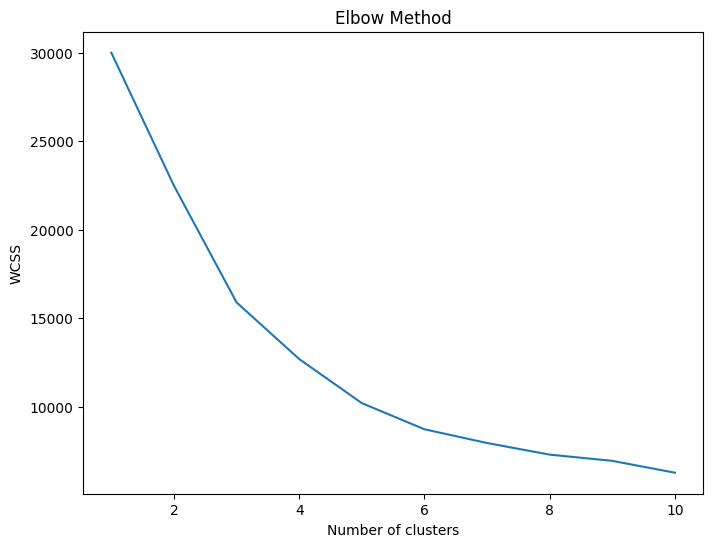

In [15]:
#@title Elbow method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


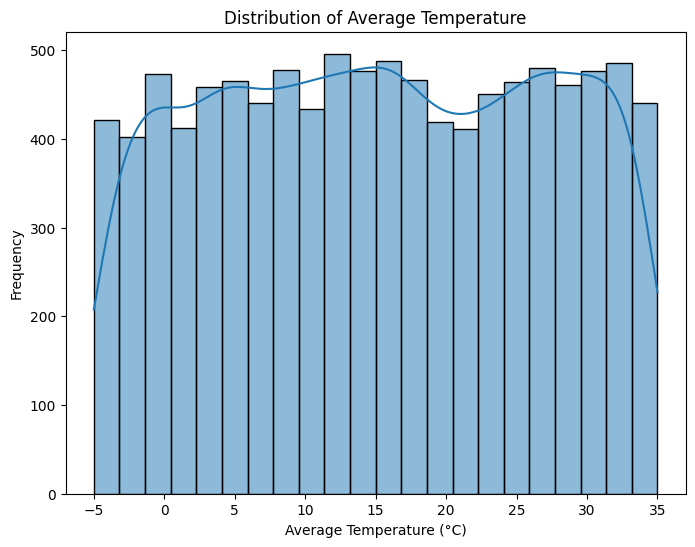

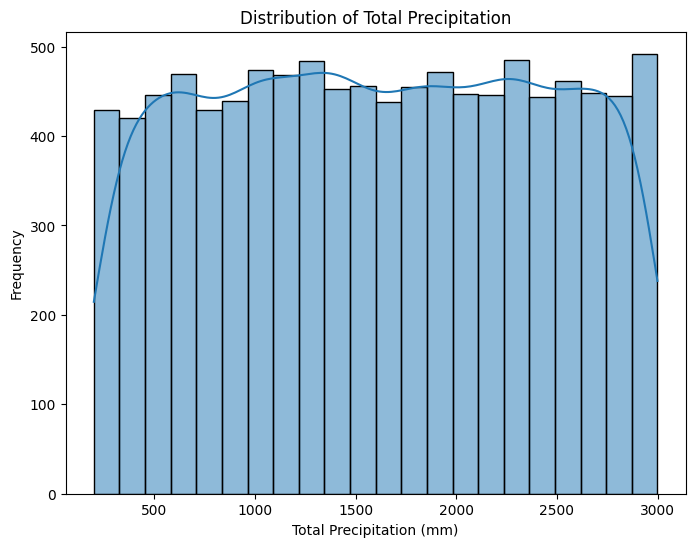

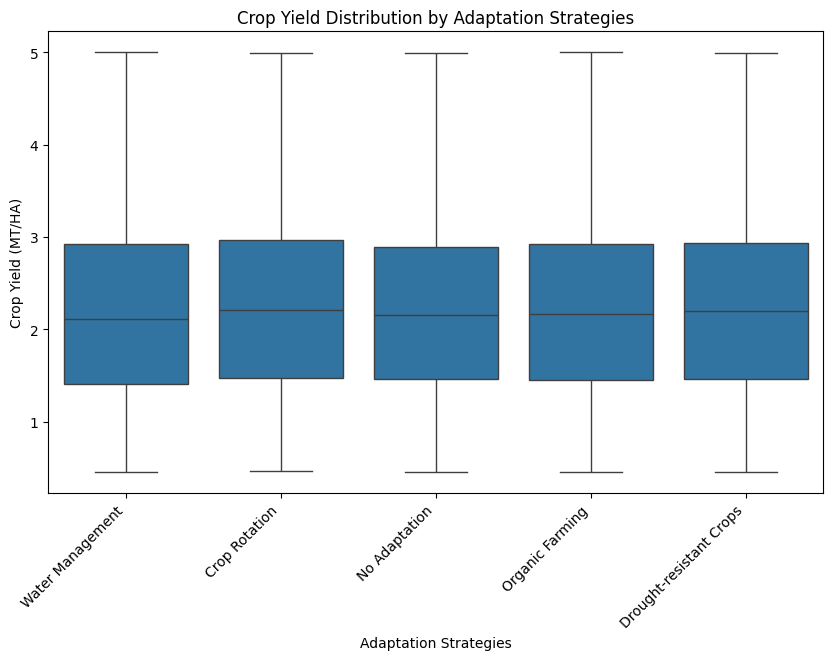

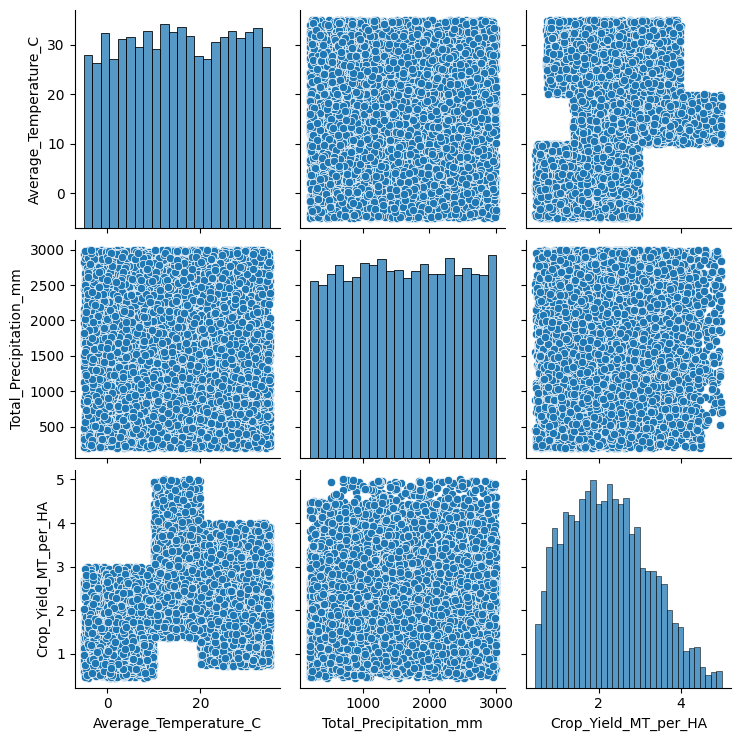

In [16]:
#@title distributon of agriculture conditiions
# Distribution of 'Average_Temperature_C'
plt.figure(figsize=(8, 6))
sns.histplot(df['Average_Temperature_C'], kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Total_Precipitation_mm'
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Precipitation_mm'], kde=True)
plt.title('Distribution of Total Precipitation')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'Crop_Yield_MT_per_HA' by 'Adaptation_Strategies'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Adaptation_Strategies', y='Crop_Yield_MT_per_HA', data=df)
plt.title('Crop Yield Distribution by Adaptation Strategies')
plt.xlabel('Adaptation Strategies')
plt.ylabel('Crop Yield (MT/HA)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Pairplot to visualize relationships between numerical variables
numerical_cols = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA']
sns.pairplot(df[numerical_cols])
plt.show()

In [17]:
#@title Prediction of Crop Yield based on Input

# Get user input for temperature and precipitation
average_temperature = 30 #@param {type:"number"}
total_precipitation = 1015 #@param {type:"number"}

# Create a DataFrame for the new data
new_data = pd.DataFrame({'Average_Temperature_C': [average_temperature],
                        'Total_Precipitation_mm': [total_precipitation]})

# Make a prediction using the trained model
predicted_yield = model.predict(new_data)

# Display the prediction
print(f"Predicted Crop Yield: {predicted_yield[0]} MT/HA")


Predicted Crop Yield: 2.54973874093322 MT/HA


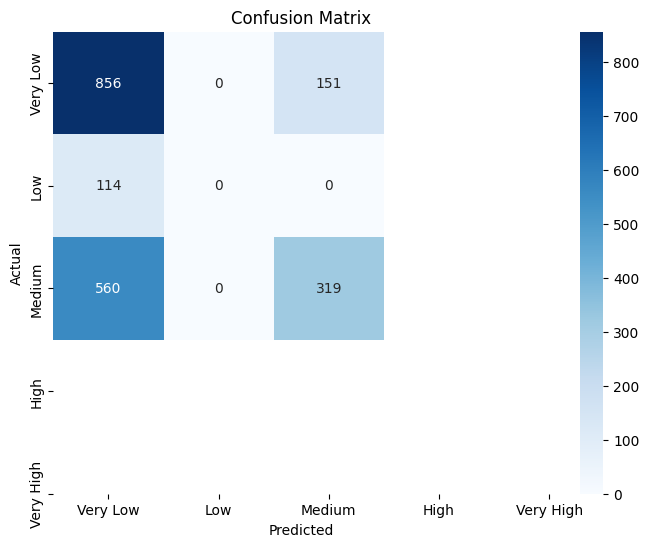

In [18]:
#@title make confusion matrix

import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels for 'Crop_Yield_MT_per_HA'
bins = [0, 2, 4, 6, 8, float('inf')]  # Example bins, adjust as needed
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Discretize y_test and y_pred using pd.cut
y_test_discretized = pd.cut(y_test, bins=bins, labels=labels)
y_pred_discretized = pd.cut(y_pred, bins=bins, labels=labels)

# Calculate the confusion matrix with discretized values
cm = confusion_matrix(y_test_discretized, y_pred_discretized)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
#@title classification report using logistic regression

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Assuming y_test and y_pred are already defined from your model evaluation
# Replace with your actual y_test and y_pred.  Since y_pred is continuous
# from linear regression, we need to discretize it for classification report.

# Define bins and labels for 'Crop_Yield_MT_per_HA'
bins = [0, 2, 4, 6, 8, float('inf')]  # Example bins, adjust as needed
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Discretize y_test and y_pred using pd.cut
y_test_discretized = pd.cut(y_test, bins=bins, labels=labels)
y_pred_discretized = pd.cut(y_pred, bins=bins, labels=labels)

# Now you can use y_test_discretized and y_pred_discretized for classification report
print(classification_report(y_test_discretized, y_pred_discretized))


              precision    recall  f1-score   support

         Low       0.56      0.85      0.67      1007
      Medium       0.00      0.00      0.00       114
    Very Low       0.68      0.36      0.47       879

    accuracy                           0.59      2000
   macro avg       0.41      0.40      0.38      2000
weighted avg       0.58      0.59      0.55      2000



In [20]:
#@title naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from your previous

# Discretize y_train for Naive Bayes
# Define bins and labels for 'Crop_Yield_MT_per_HA'
bins = [0, 2, 4, 6, 8, float('inf')]  # Example bins, adjust as needed
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Discretize y_train using pd.cut
y_train_discretized = pd.cut(y_train, bins=bins, labels=labels)

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_discretized)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Discretize y_test to match y_pred_nb
y_test_discretized = pd.cut(y_test, bins=bins, labels=labels) # Discretize y_test to match y_pred_nb


# Evaluate the model using the discretized y_test
accuracy_nb = accuracy_score(y_test_discretized, y_pred_nb) # Changed to use discretized y_test
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# You can further evaluate using confusion matrix, classification report etc. as shown in the original code.
# For example:

# Define bins and labels for 'Crop_Yield_MT_per_HA'
#bins = [0, 2, 4, 6, 8, float('inf')]  # Example bins, adjust as needed
#labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Discretize y_test and y_pred using pd.cut
#y_test_discretized = pd.cut(y_test, bins=bins, labels=labels)
# Removed the line causing the error: y_pred_nb_discretized = pd.cut(y_pred_nb, bins=bins, labels=labels)
# y_pred_nb is already discretized, no need to use pd.cut again


print(classification_report(y_test_discretized, y_pred_nb)) # Changed to use discretized y_test and removed unnecessary discretization of y_pred_nb

Naive Bayes Accuracy: 0.6195
              precision    recall  f1-score   support

         Low       0.59      0.78      0.67      1007
      Medium       0.00      0.00      0.00       114
    Very Low       0.67      0.52      0.58       879

    accuracy                           0.62      2000
   macro avg       0.42      0.43      0.42      2000
weighted avg       0.59      0.62      0.60      2000



In [21]:
#@title predicting on test data

# Example new data for prediction
new_data = pd.DataFrame({'Average_Temperature_C': [25], 'Total_Precipitation_mm': [1000]})
predicted_yield = model.predict(new_data)
print(f"Predicted Crop Yield: {predicted_yield[0]}")


Predicted Crop Yield: 2.433086117286428


In [22]:
#@title train data modeling

# Assuming X_test and the trained model are already defined from previous code blocks
# Make predictions on the test set using the linear regression model
y_pred_lr = model.predict(X_test)

# Print first 10 predictions
print(y_pred_lr[:10])


[1.89346829 2.21772189 2.6272846  2.34088175 1.87232487 2.22832096
 1.9710021  2.27096313 2.35990898 2.13494719]


In [23]:

bins = [0, 2, 4, 6, 8, float('inf')]  # Example bins, adjust as needed
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

bins = [0, 2, 4, 6, 8, float('inf')]  # Example bins, adjust as needed
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

y_test_discretized = pd.cut(y_test, bins=bins, labels=labels)
y_pred_discretized = pd.cut(y_pred, bins=bins, labels=labels)

print(classification_report(y_test_discretized, y_pred_discretized))

              precision    recall  f1-score   support

         Low       0.56      0.85      0.67      1007
      Medium       0.00      0.00      0.00       114
    Very Low       0.68      0.36      0.47       879

    accuracy                           0.59      2000
   macro avg       0.41      0.40      0.38      2000
weighted avg       0.58      0.59      0.55      2000



In [24]:

new_data = pd.DataFrame({'Average_Temperature_C': [average_temperature],
                        'Total_Precipitation_mm': [total_precipitation]})

In [27]:
#@title advance regression model

# Advanced Regression Models (Example: Random Forest)
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


# Feature Engineering (Example: Interaction Term)
df['Temperature_Precipitation_Interaction'] = df['Average_Temperature_C'] * df['Total_Precipitation_mm']
X = df[['Average_Temperature_C', 'Total_Precipitation_mm', 'Temperature_Precipitation_Interaction']]
y = df['Crop_Yield_MT_per_HA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Retrain the model with the new feature
model.fit(X_train, y_train)
y_pred_interaction = model.predict(X_test)

mse_interaction = mean_squared_error(y_test, y_pred_interaction)
r2_interaction = r2_score(y_test, y_pred_interaction)

print(f"Mean Squared Error with interaction term: {mse_interaction}")
print(f"R-squared with interaction term: {r2_interaction}")


Random Forest Mean Squared Error: 0.8525284666857501
Random Forest R-squared: 0.19227745260775586
Mean Squared Error with interaction term: 0.995656622552129
R-squared with interaction term: 0.05667161282931732


**modelbuilding** **and** **hyperparameter** **tuning**

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
#@title prepare data
X = df[['Average_Temperature_C', 'Total_Precipitation_mm']]  # Features
y = df['Crop_Yield_MT_per_HA']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#@title Define the model and hyperparameter grid
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [38]:
#@title Perform hyperparameter tuning using GridSearchCV:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
#@title Get the best model and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Mean Squared Error: 0.7323860975170199
R-squared: 0.30610555837407827


In [40]:
#@title artificial neural network
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)), # Input layer with 2 features
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print('Mean Absolute Error:', mae)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 203.5788 - mae: 7.7750 - val_loss: 1.5731 - val_mae: 1.0113
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3852 - mae: 0.9443 - val_loss: 1.4653 - val_mae: 0.9708
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5835 - mae: 1.0061 - val_loss: 1.4435 - val_mae: 0.9659
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5394 - mae: 0.9943 - val_loss: 2.4194 - val_mae: 1.2838
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5519 - mae: 1.0071 - val_loss: 1.2970 - val_mae: 0.9133
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7129 - mae: 1.0487 - val_loss: 1.1996 - val_mae: 0.8735
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7506 - mae: 1.0519 - val_loss: 1.9437 - val_mae: 1.1312
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9999 - mae: 1.3502 - val_loss: 1.1282 - val_mae: 0.8467
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8m

# ** model comparison**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 1.0161433219909668
               Model       MSE  R-squared
0  Linear Regression  0.995596   0.056729
1      Random Forest  0.852528   0.192277
2                ANN  1.500288  -0.421438


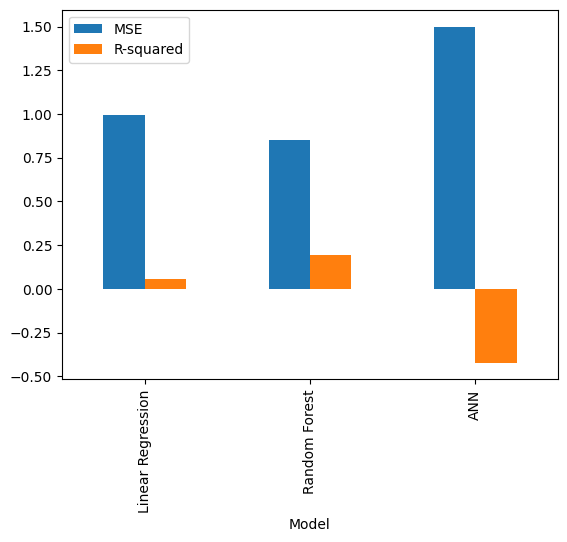

In [42]:
# ... (your existing code for Linear Regression, Random Forest, and potentially ANNs) ...
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Linear Regression (Assuming X_train, X_test, y_train, y_test are already defined)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest (Assuming you have already trained and evaluated your Random Forest model)
# ... (your existing code for Random Forest) ...
# Make sure mse_rf and r2_rf are calculated and assigned values

# Artificial Neural Network (Assuming you have already trained and evaluated your ANN)
# ... (your existing code for ANN) ...
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model_ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, mae = model_ann.evaluate(X_test, y_test, verbose=0)
y_pred_ann = model_ann.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print('Mean Absolute Error:', mae)


# Store results in a dictionary or DataFrame
results = {
    'Model': ['Linear Regression', 'Random Forest', 'ANN'],
    'MSE': [mse_lr, mse_rf, mse_ann],
    'R-squared': [r2_lr, r2_rf, r2_ann],
    # Add other metrics as needed
}
results_df = pd.DataFrame(results)

# Print or visualize the results
print(results_df)
# or
results_df.plot(x='Model', y=['MSE', 'R-squared'], kind='bar')
plt.show()